In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [26]:
edu_df['AVG_MATH_4_SCORE'].fillna(edu_df['AVG_MATH_4_SCORE'].mean(), inplace=True)
edu_df['AVG_MATH_8_SCORE'].fillna(edu_df['AVG_MATH_8_SCORE'].mean(), inplace=True)
edu_df['AVG_READING_4_SCORE'].fillna(edu_df['AVG_READING_4_SCORE'].mean(), inplace=True)
edu_df['AVG_READING_8_SCORE'].fillna(edu_df['AVG_READING_8_SCORE'].mean(), inplace=True)
edu_df.isnull().sum()*100/edu_df.count()


PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          21.399512
TOTAL_REVENUE                   16.562500
FEDERAL_REVENUE                 16.562500
STATE_REVENUE                   16.562500
LOCAL_REVENUE                   16.562500
TOTAL_EXPENDITURE               16.562500
INSTRUCTION_EXPENDITURE         16.562500
SUPPORT_SERVICES_EXPENDITURE    16.562500
OTHER_EXPENDITURE               21.399512
CAPITAL_OUTLAY_EXPENDITURE      16.562500
GRADES_PK_G                     13.115997
GRADES_KG_G                      9.705882
GRADES_4_G                       9.625276
GRADES_8_G                       9.625276
GRADES_12_G                      9.625276
GRADES_1_8_G                     9.625276
GRADES_9_12_G                    9.625276
GRADES_ALL_G                    13.115997
AVG_MATH_4_SCORE                 0.000000
AVG_MATH_8_SCORE                 0.000000
AVG_READING_4_SCORE              0

In [27]:
# Create weight for varying number of students
edu_df['g4_weight'] = edu_df['GRADES_4_G']/(edu_df['GRADES_4_G'] + edu_df['GRADES_8_G'])
edu_df['g8_weight'] = edu_df['GRADES_8_G']/(edu_df['GRADES_4_G'] + edu_df['GRADES_8_G'])
edu_df['AVG_4_SCORE'] = (edu_df['AVG_MATH_4_SCORE'] * edu_df['g4_weight']) + (edu_df['AVG_READING_4_SCORE'] * edu_df['g4_weight'])
edu_df['AVG_8_SCORE'] = (edu_df['AVG_MATH_8_SCORE'] * edu_df['g8_weight']) + (edu_df['AVG_READING_8_SCORE'] * edu_df['g8_weight'])
edu_df.head()



,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,g4_weight,g8_weight,AVG_4_SCORE,AVG_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132,0.499668,0.500332,208.007499,258.095575
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712,0.525867,0.474133,238.551469,254.739435
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,0.530388,0.469612,223.540967,247.737173
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,0.490240,0.509760,205.332216,265.550351
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132,0.535257,0.464743,216.866589,243.782437


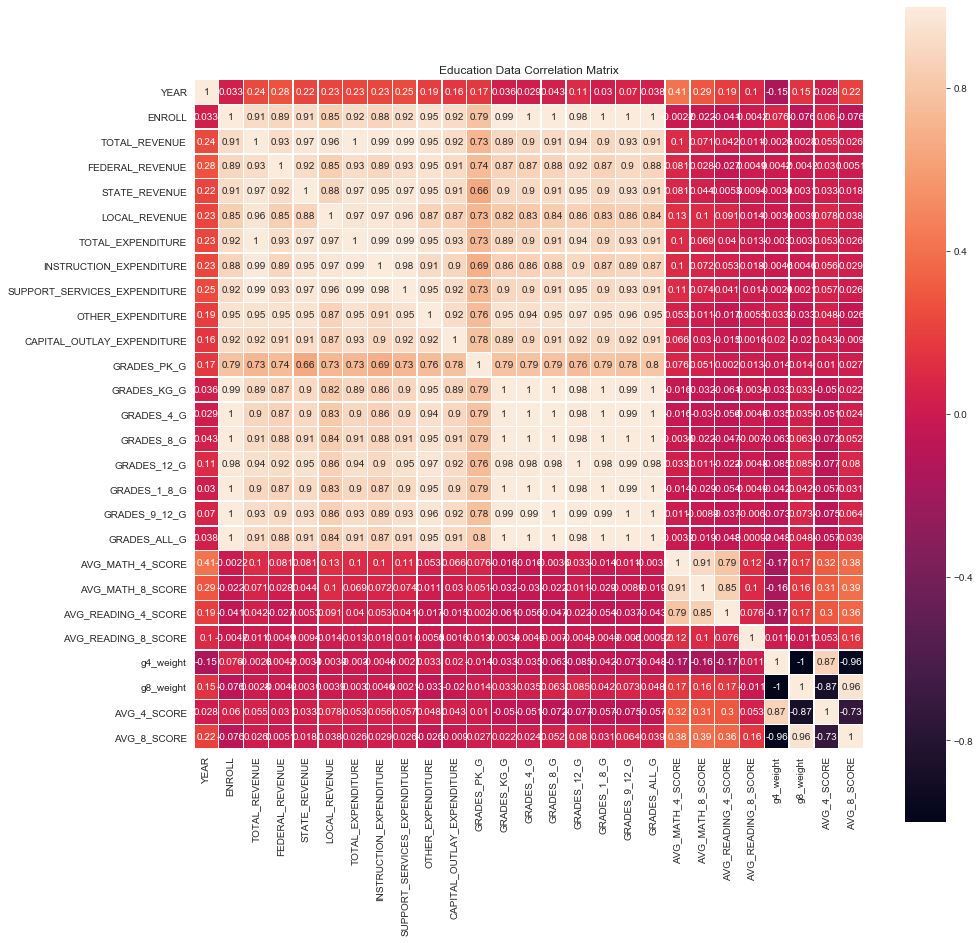

In [31]:
edu_df.corr()

# Create correlation matrix objects
corrmat_edu = edu_df.corr()
plt.figure(figsize=(15,15))

# Draw heatmap with seaborn
sns.heatmap(corrmat_edu, square=True, annot=True, linewidths=.5)
plt.title("Education Data Correlation Matrix")
plt.show()

2. Average 4th grade scores seem to most closely correlate with support services expenditure. Average 8th grade scores seem to most closely correlate with instructor expenditure.

In [37]:
redu_df = edu_df.loc[:,'TOTAL_EXPENDITURE':].dropna()

# Normalizing data
X = StandardScaler().fit_transform(redu_df)

Xt=X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


Covariance Matrix:
 [[ 1.00085690e+00  9.92030256e-01  9.94300831e-01  9.45625591e-01
   9.35486636e-01  7.29417000e-01  8.94208174e-01  8.98546285e-01
   9.11558951e-01  9.38981302e-01  9.01014403e-01  9.28056246e-01
   9.11241538e-01  9.40327365e-02  5.99849248e-02  4.29541258e-02
   1.81936148e-02  2.90865670e-03 -2.90865670e-03  4.94315304e-02
   1.73679868e-02]
 [ 9.92030256e-01  1.00085690e+00  9.77800054e-01  9.08779702e-01
   8.98592177e-01  6.87843817e-01  8.59724373e-01  8.64228063e-01
   8.76876542e-01  9.02974168e-01  8.66774384e-01  8.93704945e-01
   8.76467642e-01  9.65244377e-02  6.41337841e-02  5.85659064e-02
   2.32408134e-02  1.17853953e-03 -1.17853953e-03  5.30387739e-02
   2.11853962e-02]
 [ 9.94300831e-01  9.77800054e-01  1.00085690e+00  9.51974926e-01
   9.21753068e-01  7.30115058e-01  8.97546015e-01  9.00971057e-01
   9.14356158e-01  9.45864078e-01  9.03442798e-01  9.31626109e-01
   9.13995386e-01  1.01595297e-01  6.54398866e-02  4.54086623e-02
   1.57422888e-02 

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.57253527 0.18228684 0.13637457 0.04818407 0.02075528]


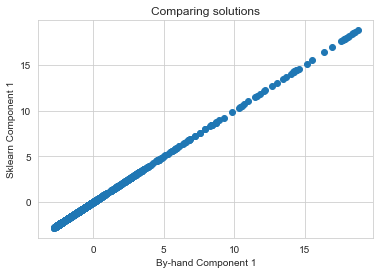

In [38]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:,0]

Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

3. 0.5725 explained by fist component
